# 시각화 테스트

## 1. DVC VScode Plugin Reversing

동작구조 이해<br>
시각화 가능 여부 체크<br>
헤드 단위 변화 감지 및 시각화 표현 테스트

### TSV 포맷 작성 방식 테스트

In [1]:
import random
import sys
from dvclive import Live

# Jupyter notebook에서는 sys.argv 대신 직접 값을 설정
epochs = 10  # 원하는 epoch 수로 변경

with Live(save_dvc_exp=True) as live:
    live.log_param("epochs", epochs)
    for epoch in range(epochs):
        live.log_metric("train/accuracy", epoch + random.random())
        live.log_metric("train/loss", epochs - epoch - random.random())
        live.log_metric("val/accuracy",epoch + random.random() )
        live.log_metric("val/loss", epochs - epoch - random.random())
        live.next_step()

/Users/bhc/opt/anaconda3/envs/dvc-test/lib/python3.12/site-packages/dvclive/monitor_system.py:11: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  from pynvml import (


> Data Series 데이터는 linear plot, confusion matrix, bar plot 외 표현 불가.

### 이미지 생성 및 출력 테스트

수동으로 데이터에 대한 플롯 이미지 생성 후 플러그인에서 해당 이미지를 읽어들여 표현하는 방식

In [10]:
# 다양한 차트 타입을 생성하고 이미지로 저장하는 시스템
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
import os
from datetime import datetime

In [ ]:
# 스타일 설정
plt.style.use('default')
sns.set_palette("husl")

# dvclive/vis_test/ 디렉토리 생성
os.makedirs('dvclive/vis_test', exist_ok=True)

print("🎨 다양한 차트 타입 생성 시작...")
print(f"저장 위치: dvclive/vis_test/")
print(f"생성 시간: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


🎨 다양한 차트 타입 생성 시작...
저장 위치: dvclive/vis_test/
생성 시간: 2025-09-29 16:03:46


In [5]:
# 1. 라인 플롯 (Line Plot)
def create_line_plot():
    """시계열 라인 플롯 생성"""
    x = np.linspace(0, 10, 50)
    y1 = np.sin(x) + np.random.normal(0, 0.1, 50)
    y2 = np.cos(x) + np.random.normal(0, 0.1, 50)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y1, label='Sine Wave', linewidth=2)
    plt.plot(x, y2, label='Cosine Wave', linewidth=2)
    plt.title('Line Plot - Sine and Cosine Waves', fontsize=14, fontweight='bold')
    plt.xlabel('X Values')
    plt.ylabel('Y Values')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('dvclive/vis_test/line_plot.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("✅ 라인 플롯 생성 완료")

# 2. 산점도 (Scatter Plot)
def create_scatter_plot():
    """산점도 생성"""
    n = 100
    x = np.random.normal(5, 2, n)
    y = 2 * x + np.random.normal(0, 3, n)
    colors = np.random.rand(n)
    sizes = np.random.randint(20, 200, n)
    
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(x, y, c=colors, s=sizes, alpha=0.6, cmap='viridis')
    plt.colorbar(scatter, label='Color Values')
    plt.title('Scatter Plot - X vs Y with Color and Size', fontsize=14, fontweight='bold')
    plt.xlabel('X Values')
    plt.ylabel('Y Values')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('dvclive/vis_test/scatter_plot.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("✅ 산점도 생성 완료")

# 3. 바 차트 (Bar Chart)
def create_bar_chart():
    """바 차트 생성"""
    categories = ['Category A', 'Category B', 'Category C', 'Category D', 'Category E']
    values = [random.uniform(10, 100) for _ in categories]
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(categories, values, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
    plt.title('Bar Chart - Category Performance', fontsize=14, fontweight='bold')
    plt.xlabel('Categories')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    
    # 값 표시
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                f'{value:.1f}', ha='center', va='bottom')
    
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.savefig('dvclive/vis_test/bar_chart.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("✅ 바 차트 생성 완료")

# 4. 히스토그램 (Histogram)
def create_histogram():
    """히스토그램 생성"""
    data1 = np.random.normal(5, 1.5, 1000)
    data2 = np.random.normal(8, 1, 800)
    data3 = np.random.normal(3, 1.2, 600)
    
    plt.figure(figsize=(10, 6))
    plt.hist(data1, bins=30, alpha=0.7, label='Group 1', color='skyblue', edgecolor='black')
    plt.hist(data2, bins=30, alpha=0.7, label='Group 2', color='lightcoral', edgecolor='black')
    plt.hist(data3, bins=30, alpha=0.7, label='Group 3', color='lightgreen', edgecolor='black')
    plt.title('Histogram - Multiple Groups Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('dvclive/vis_test/histogram.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("✅ 히스토그램 생성 완료")

# 5. 히트맵 (Heatmap)
def create_heatmap():
    """히트맵 생성"""
    data = np.random.rand(10, 12)
    labels_x = [f'X{i}' for i in range(12)]
    labels_y = [f'Y{i}' for i in range(10)]
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(data, annot=True, fmt='.2f', cmap='YlOrRd', 
                xticklabels=labels_x, yticklabels=labels_y,
                cbar_kws={'label': 'Values'})
    plt.title('Heatmap - 2D Data Visualization', fontsize=14, fontweight='bold')
    plt.xlabel('X Labels')
    plt.ylabel('Y Labels')
    plt.tight_layout()
    plt.savefig('dvclive/vis_test/heatmap.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("✅ 히트맵 생성 완료")

# 차트 생성 실행
create_line_plot()
create_scatter_plot()
create_bar_chart()
create_histogram()
create_heatmap()


✅ 라인 플롯 생성 완료
✅ 산점도 생성 완료
✅ 바 차트 생성 완료
✅ 히스토그램 생성 완료
✅ 히트맵 생성 완료


In [11]:
# 6. 박스 플롯 (Box Plot)
def create_box_plot():
    """박스 플롯 생성"""
    data = [np.random.normal(5, 1.5, 100) for _ in range(4)]
    labels = ['Group A', 'Group B', 'Group C', 'Group D']
    
    plt.figure(figsize=(10, 6))
    box_plot = plt.boxplot(data, labels=labels, patch_artist=True)
    colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
    
    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    plt.title('Box Plot - Group Distribution Comparison', fontsize=14, fontweight='bold')
    plt.xlabel('Groups')
    plt.ylabel('Values')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('dvclive/vis_test/box_plot.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("✅ 박스 플롯 생성 완료")

# 7. 파이 차트 (Pie Chart)
def create_pie_chart():
    """파이 차트 생성"""
    labels = ['Desktop', 'Mobile', 'Tablet', 'Smart TV', 'Other']
    sizes = [35, 30, 15, 12, 8]
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
    explode = (0.05, 0, 0, 0, 0)  # 첫 번째 조각 강조
    
    plt.figure(figsize=(10, 8))
    wedges, texts, autotexts = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
                                      autopct='%1.1f%%', shadow=True, startangle=90)
    
    # 텍스트 스타일 설정
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
    
    plt.title('Pie Chart - Device Usage Distribution', fontsize=14, fontweight='bold')
    plt.axis('equal')
    plt.tight_layout()
    plt.savefig('dvclive/vis_test/pie_chart.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("✅ 파이 차트 생성 완료")

# 8. 영역 차트 (Area Chart)
def create_area_chart():
    """영역 차트 생성"""
    x = np.linspace(0, 10, 50)
    y1 = np.sin(x) + 2
    y2 = np.cos(x) + 2
    y3 = np.sin(x + np.pi/4) + 2
    
    plt.figure(figsize=(12, 6))
    plt.fill_between(x, 0, y1, alpha=0.7, label='Series 1', color='skyblue')
    plt.fill_between(x, y1, y1 + y2, alpha=0.7, label='Series 2', color='lightcoral')
    plt.fill_between(x, y1 + y2, y1 + y2 + y3, alpha=0.7, label='Series 3', color='lightgreen')
    
    plt.title('Area Chart - Stacked Time Series', fontsize=14, fontweight='bold')
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('dvclive/vis_test/area_chart.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("✅ 영역 차트 생성 완료")

# 9. 바이올린 플롯 (Violin Plot)
def create_violin_plot():
    """바이올린 플롯 생성"""
    data = [np.random.normal(5, 1.5, 200) for _ in range(4)]
    labels = ['Group A', 'Group B', 'Group C', 'Group D']
    
    plt.figure(figsize=(10, 6))
    parts = plt.violinplot(data, positions=range(1, 5), showmeans=True, showmedians=True)
    
    # 색상 설정
    colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
    for pc, color in zip(parts['bodies'], colors):
        pc.set_facecolor(color)
        pc.set_alpha(0.7)
    
    plt.xticks(range(1, 5), labels)
    plt.title('Violin Plot - Distribution Shape Comparison', fontsize=14, fontweight='bold')
    plt.xlabel('Groups')
    plt.ylabel('Values')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('dvclive/vis_test/violin_plot.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("✅ 바이올린 플롯 생성 완료")

# 10. 산점도 매트릭스 (Scatter Matrix)
def create_scatter_matrix():
    """산점도 매트릭스 생성"""
    n = 200
    data = pd.DataFrame({
        'X1': np.random.normal(5, 2, n),
        'X2': np.random.normal(3, 1.5, n),
        'X3': np.random.normal(7, 1, n),
        'X4': np.random.normal(4, 2.5, n)
    })
    
    plt.figure(figsize=(12, 10))
    pd.plotting.scatter_matrix(data, alpha=0.6, figsize=(12, 10), diagonal='hist')
    plt.suptitle('Scatter Matrix - Multi-dimensional Data', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('dvclive/vis_test/scatter_matrix.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("✅ 산점도 매트릭스 생성 완료")

# 추가 차트들 생성
create_box_plot()
create_pie_chart()
create_area_chart()
create_violin_plot()
create_scatter_matrix()


/var/folders/9c/d9bwhd_11tqdj2jhtjf0wmh80000gn/T/ipykernel_69760/2593960655.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(data, labels=labels, patch_artist=True)


✅ 박스 플롯 생성 완료
✅ 파이 차트 생성 완료
✅ 영역 차트 생성 완료
✅ 바이올린 플롯 생성 완료
✅ 산점도 매트릭스 생성 완료


<Figure size 1200x1000 with 0 Axes>

In [7]:
# 11. 등고선 플롯 (Contour Plot)
def create_contour_plot():
    """등고선 플롯 생성"""
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.sin(X) * np.cos(Y)
    
    plt.figure(figsize=(10, 8))
    contour = plt.contour(X, Y, Z, levels=20, colors='black', alpha=0.6)
    contourf = plt.contourf(X, Y, Z, levels=20, cmap='viridis', alpha=0.8)
    plt.colorbar(contourf, label='Z Values')
    plt.title('Contour Plot - 3D Surface Visualization', fontsize=14, fontweight='bold')
    plt.xlabel('X Values')
    plt.ylabel('Y Values')
    plt.tight_layout()
    plt.savefig('dvclive/vis_test/contour_plot.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("✅ 등고선 플롯 생성 완료")

# 12. 3D 산점도 (3D Scatter Plot)
def create_3d_scatter():
    """3D 산점도 생성"""
    from mpl_toolkits.mplot3d import Axes3D
    
    n = 100
    x = np.random.normal(5, 2, n)
    y = np.random.normal(3, 1.5, n)
    z = np.random.normal(7, 1, n)
    colors = np.random.rand(n)
    
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(x, y, z, c=colors, cmap='viridis', s=50, alpha=0.6)
    ax.set_xlabel('X Values')
    ax.set_ylabel('Y Values')
    ax.set_zlabel('Z Values')
    ax.set_title('3D Scatter Plot - Multi-dimensional Data', fontsize=14, fontweight='bold')
    plt.colorbar(scatter, label='Color Values')
    plt.tight_layout()
    plt.savefig('dvclive/vis_test/3d_scatter.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("✅ 3D 산점도 생성 완료")

# 13. 레이더 차트 (Radar Chart)
def create_radar_chart():
    """레이더 차트 생성"""
    categories = ['Speed', 'Accuracy', 'Reliability', 'Ease of Use', 'Cost', 'Support']
    values1 = [8, 7, 9, 6, 7, 8]
    values2 = [6, 8, 7, 9, 8, 7]
    
    # 각도 계산
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    values1 += values1[:1]  # 닫힌 다각형을 위해 첫 번째 값 추가
    values2 += values2[:1]
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    ax.plot(angles, values1, 'o-', linewidth=2, label='Product A', color='blue')
    ax.fill(angles, values1, alpha=0.25, color='blue')
    ax.plot(angles, values2, 'o-', linewidth=2, label='Product B', color='red')
    ax.fill(angles, values2, alpha=0.25, color='red')
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_ylim(0, 10)
    ax.set_title('Radar Chart - Product Comparison', fontsize=14, fontweight='bold', pad=20)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    ax.grid(True)
    plt.tight_layout()
    plt.savefig('dvclive/vis_test/radar_chart.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("✅ 레이더 차트 생성 완료")

# 14. 트리맵 (Treemap)
def create_treemap():
    """트리맵 생성"""
    import squarify
    
    sizes = [40, 30, 20, 10]
    labels = ['Category A', 'Category B', 'Category C', 'Category D']
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
    
    plt.figure(figsize=(10, 8))
    squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7)
    plt.title('Treemap - Hierarchical Data Visualization', fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('dvclive/vis_test/treemap.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("✅ 트리맵 생성 완료")

# 15. 산점도 버블 차트 (Bubble Chart)
def create_bubble_chart():
    """버블 차트 생성"""
    n = 50
    x = np.random.normal(5, 2, n)
    y = np.random.normal(3, 1.5, n)
    sizes = np.random.randint(20, 300, n)
    colors = np.random.rand(n)
    
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(x, y, s=sizes, c=colors, alpha=0.6, cmap='plasma')
    plt.colorbar(scatter, label='Color Values')
    plt.title('Bubble Chart - X vs Y with Size and Color', fontsize=14, fontweight='bold')
    plt.xlabel('X Values')
    plt.ylabel('Y Values')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('dvclive/vis_test/bubble_chart.png', dpi=300, bbox_inches='tight')
    plt.close()
    print("✅ 버블 차트 생성 완료")

# 고급 차트들 생성
create_contour_plot()
create_3d_scatter()
create_radar_chart()
create_treemap()
create_bubble_chart()


✅ 등고선 플롯 생성 완료
✅ 3D 산점도 생성 완료
✅ 레이더 차트 생성 완료
✅ 트리맵 생성 완료
✅ 버블 차트 생성 완료


In [12]:
# 생성된 이미지 파일들 확인 및 요약
import os
import glob

def check_generated_charts():
    """생성된 차트 이미지 파일들을 확인하고 요약"""
    
    vis_test_dir = "dvclive/vis_test"
    
    if os.path.exists(vis_test_dir):
        # PNG 파일들 찾기
        png_files = glob.glob(os.path.join(vis_test_dir, "*.png"))
        
        print(f"\n📊 생성된 차트 이미지 파일들 ({len(png_files)}개):")
        print("=" * 60)
        
        for i, file_path in enumerate(sorted(png_files), 1):
            file_name = os.path.basename(file_path)
            file_size = os.path.getsize(file_path)
            file_size_mb = file_size / (1024 * 1024)
            print(f"{i:2d}. {file_name:<25} ({file_size_mb:.2f} MB)")
        
        print("=" * 60)
        print(f"총 파일 크기: {sum(os.path.getsize(f) for f in png_files) / (1024 * 1024):.2f} MB")
        
        # 차트 타입별 분류
        chart_types = {
            "기본 차트": ["line_plot", "scatter_plot", "bar_chart", "histogram", "heatmap"],
            "분포 차트": ["box_plot", "violin_plot"],
            "비율 차트": ["pie_chart", "area_chart"],
            "고급 차트": ["scatter_matrix", "contour_plot", "3d_scatter", "radar_chart", "treemap", "bubble_chart"]
        }
        
        print(f"\n📈 차트 타입별 분류:")
        for category, charts in chart_types.items():
            print(f"\n{category}:")
            for chart in charts:
                if f"{chart}.png" in [os.path.basename(f) for f in png_files]:
                    print(f"  ✅ {chart.replace('_', ' ').title()}")
                else:
                    print(f"  ❌ {chart.replace('_', ' ').title()}")
    
    else:
        print("❌ dvclive/vis_test 디렉토리가 존재하지 않습니다.")

# 생성된 차트들 확인
check_generated_charts()



📊 생성된 차트 이미지 파일들 (15개):
 1. 3d_scatter.png            (0.66 MB)
 2. area_chart.png            (0.24 MB)
 3. bar_chart.png             (0.10 MB)
 4. box_plot.png              (0.07 MB)
 5. bubble_chart.png          (0.23 MB)
 6. contour_plot.png          (1.04 MB)
 7. heatmap.png               (0.38 MB)
 8. histogram.png             (0.09 MB)
 9. line_plot.png             (0.23 MB)
10. pie_chart.png             (0.25 MB)
11. radar_chart.png           (0.45 MB)
12. scatter_matrix.png        (0.63 MB)
13. scatter_plot.png          (0.29 MB)
14. treemap.png               (0.07 MB)
15. violin_plot.png           (0.12 MB)
총 파일 크기: 4.86 MB

📈 차트 타입별 분류:

기본 차트:
  ✅ Line Plot
  ✅ Scatter Plot
  ✅ Bar Chart
  ✅ Histogram
  ✅ Heatmap

분포 차트:
  ✅ Box Plot
  ✅ Violin Plot

비율 차트:
  ✅ Pie Chart
  ✅ Area Chart

고급 차트:
  ✅ Scatter Matrix
  ✅ Contour Plot
  ✅ 3D Scatter
  ✅ Radar Chart
  ✅ Treemap
  ✅ Bubble Chart


In [9]:
# DVC가 이미지 파일들을 인식할 수 있도록 dvc.yaml 파일 생성
def create_dvc_yaml_for_images():
    """생성된 이미지 파일들을 DVC가 인식할 수 있도록 dvc.yaml 파일 생성"""
    
    yaml_content = """params:
- dvclive/params.yaml
metrics:
- dvclive/metrics.json
plots:
# 생성된 차트 이미지들을 DVC plots로 설정
# 기본 차트들
- dvclive/vis_test/line_plot.png:
    title: "Line Plot - Sine and Cosine Waves"
- dvclive/vis_test/scatter_plot.png:
    title: "Scatter Plot - X vs Y with Color and Size"
- dvclive/vis_test/bar_chart.png:
    title: "Bar Chart - Category Performance"
- dvclive/vis_test/histogram.png:
    title: "Histogram - Multiple Groups Distribution"
- dvclive/vis_test/heatmap.png:
    title: "Heatmap - 2D Data Visualization"

# 분포 차트들
- dvclive/vis_test/box_plot.png:
    title: "Box Plot - Group Distribution Comparison"
- dvclive/vis_test/violin_plot.png:
    title: "Violin Plot - Distribution Shape Comparison"

# 비율 차트들
- dvclive/vis_test/pie_chart.png:
    title: "Pie Chart - Device Usage Distribution"
- dvclive/vis_test/area_chart.png:
    title: "Area Chart - Stacked Time Series"

# 고급 차트들
- dvclive/vis_test/scatter_matrix.png:
    title: "Scatter Matrix - Multi-dimensional Data"
- dvclive/vis_test/contour_plot.png:
    title: "Contour Plot - 3D Surface Visualization"
- dvclive/vis_test/3d_scatter.png:
    title: "3D Scatter Plot - Multi-dimensional Data"
- dvclive/vis_test/radar_chart.png:
    title: "Radar Chart - Product Comparison"
- dvclive/vis_test/treemap.png:
    title: "Treemap - Hierarchical Data Visualization"
- dvclive/vis_test/bubble_chart.png:
    title: "Bubble Chart - X vs Y with Size and Color"

# 기존 dvclive 메트릭
- dvclive/plots/metrics:
    x: step
"""
    
    with open('dvc.yaml', 'w') as f:
        f.write(yaml_content)
    
    print("✅ dvc.yaml 파일 생성 완료!")
    print("📁 생성된 차트 이미지들을 DVC plots로 설정했습니다.")
    print("🎯 VSCode DVC 플러그인에서 모든 차트를 확인할 수 있습니다.")

# DVC YAML 파일 생성
create_dvc_yaml_for_images()


✅ dvc.yaml 파일 생성 완료!
📁 생성된 차트 이미지들을 DVC plots로 설정했습니다.
🎯 VSCode DVC 플러그인에서 모든 차트를 확인할 수 있습니다.


In [10]:
# 최종 요약 및 사용 방법 안내
print("🎉 모든 차트 생성 및 DVC 설정 완료!")
print("=" * 80)

print("\n📊 생성된 차트 타입들:")
print("1. 기본 차트 (5개):")
print("   - 라인 플롯 (Line Plot)")
print("   - 산점도 (Scatter Plot)")
print("   - 바 차트 (Bar Chart)")
print("   - 히스토그램 (Histogram)")
print("   - 히트맵 (Heatmap)")

print("\n2. 분포 차트 (2개):")
print("   - 박스 플롯 (Box Plot)")
print("   - 바이올린 플롯 (Violin Plot)")

print("\n3. 비율 차트 (2개):")
print("   - 파이 차트 (Pie Chart)")
print("   - 영역 차트 (Area Chart)")

print("\n4. 고급 차트 (6개):")
print("   - 산점도 매트릭스 (Scatter Matrix)")
print("   - 등고선 플롯 (Contour Plot)")
print("   - 3D 산점도 (3D Scatter Plot)")
print("   - 레이더 차트 (Radar Chart)")
print("   - 트리맵 (Treemap)")
print("   - 버블 차트 (Bubble Chart)")

print("\n📁 파일 위치:")
print("   - 차트 이미지: dvclive/vis_test/*.png")
print("   - DVC 설정: dvc.yaml")

print("\n🎯 사용 방법:")
print("1. VSCode에서 DVC 플러그인 설치 및 활성화")
print("2. DVC Plots 패널에서 모든 차트 확인")
print("3. 각 차트는 고해상도 PNG 이미지로 저장됨")
print("4. 무작위 데이터로 구성되어 실제 사용 시나리오와 유사")

print("\n✨ 특징:")
print("- 총 15가지 다양한 차트 타입")
print("- 고해상도 (300 DPI) 이미지")
print("- 무작위 데이터로 현실적인 패턴")
print("- DVC VSCode 플러그인과 완벽 호환")
print("- 각 차트별 제목과 설명 포함")

print("\n" + "=" * 80)
print("🚀 이제 VSCode DVC 플러그인에서 모든 차트를 확인해보세요!")


🎉 모든 차트 생성 및 DVC 설정 완료!

📊 생성된 차트 타입들:
1. 기본 차트 (5개):
   - 라인 플롯 (Line Plot)
   - 산점도 (Scatter Plot)
   - 바 차트 (Bar Chart)
   - 히스토그램 (Histogram)
   - 히트맵 (Heatmap)

2. 분포 차트 (2개):
   - 박스 플롯 (Box Plot)
   - 바이올린 플롯 (Violin Plot)

3. 비율 차트 (2개):
   - 파이 차트 (Pie Chart)
   - 영역 차트 (Area Chart)

4. 고급 차트 (6개):
   - 산점도 매트릭스 (Scatter Matrix)
   - 등고선 플롯 (Contour Plot)
   - 3D 산점도 (3D Scatter Plot)
   - 레이더 차트 (Radar Chart)
   - 트리맵 (Treemap)
   - 버블 차트 (Bubble Chart)

📁 파일 위치:
   - 차트 이미지: dvclive/vis_test/*.png
   - DVC 설정: dvc.yaml

🎯 사용 방법:
1. VSCode에서 DVC 플러그인 설치 및 활성화
2. DVC Plots 패널에서 모든 차트 확인
3. 각 차트는 고해상도 PNG 이미지로 저장됨
4. 무작위 데이터로 구성되어 실제 사용 시나리오와 유사

✨ 특징:
- 총 15가지 다양한 차트 타입
- 고해상도 (300 DPI) 이미지
- 무작위 데이터로 현실적인 패턴
- DVC VSCode 플러그인과 완벽 호환
- 각 차트별 제목과 설명 포함

🚀 이제 VSCode DVC 플러그인에서 모든 차트를 확인해보세요!


## 2. 캐시 데이터 분석 및 시각화


In [1]:
# 실제 캐시 데이터 로드 및 시각화
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import os

cache_dir = Path("../datasets/test_data/cache")
os.makedirs('dvclive/cache_viz', exist_ok=True)

print("📦 실제 캐시 데이터 분석 시작")
print("=" * 80)

📦 실제 캐시 데이터 분석 시작


In [6]:
# 1. Attribute Analysis 캐시 로드
with open(cache_dir / 'analysis_attribute_analysis_test_data.cache', 'rb') as f:
    attr_data = pickle.load(f)

print(f"✅ Attribute 데이터 로드: {len(attr_data)}개 파일")
print(f"샘플 파일: {list(attr_data.keys())[:3]}")

# 데이터 추출
sizes = [v['size'] for v in attr_data.values()]
formats = [v['format'] for v in attr_data.values()]
widths = [v['width'] for v in attr_data.values()]
heights = [v['height'] for v in attr_data.values()]
noise_levels = [v['noise_level'] for v in attr_data.values()]
sharpness = [v['sharpness'] for v in attr_data.values()]

print(f"\n📊 추출된 속성:")
print(f"  - 파일 크기 범위: {min(sizes):.2f} ~ {max(sizes):.2f} MB")
print(f"  - 파일 형식: {set(formats)}")
print(f"  - 해상도 범위: {min(widths)}x{min(heights)} ~ {max(widths)}x{max(heights)}")
print(f"  - 노이즈 레벨 범위: {min(noise_levels):.2f} ~ {max(noise_levels):.2f}")
print(f"  - 선명도 범위: {min(sharpness):.2f} ~ {max(sharpness):.2f}")

✅ Attribute 데이터 로드: 15개 파일
샘플 파일: ['IMG_3194.jpeg', 'jpark1.jpg', 'IMG_3146.jpeg']

📊 추출된 속성:
  - 파일 크기 범위: 0.03 ~ 3.29 MB
  - 파일 형식: {'PNG', 'JPEG'}
  - 해상도 범위: 256x256 ~ 4032x3024
  - 노이즈 레벨 범위: 0.11 ~ 0.48
  - 선명도 범위: 0.01 ~ 0.10


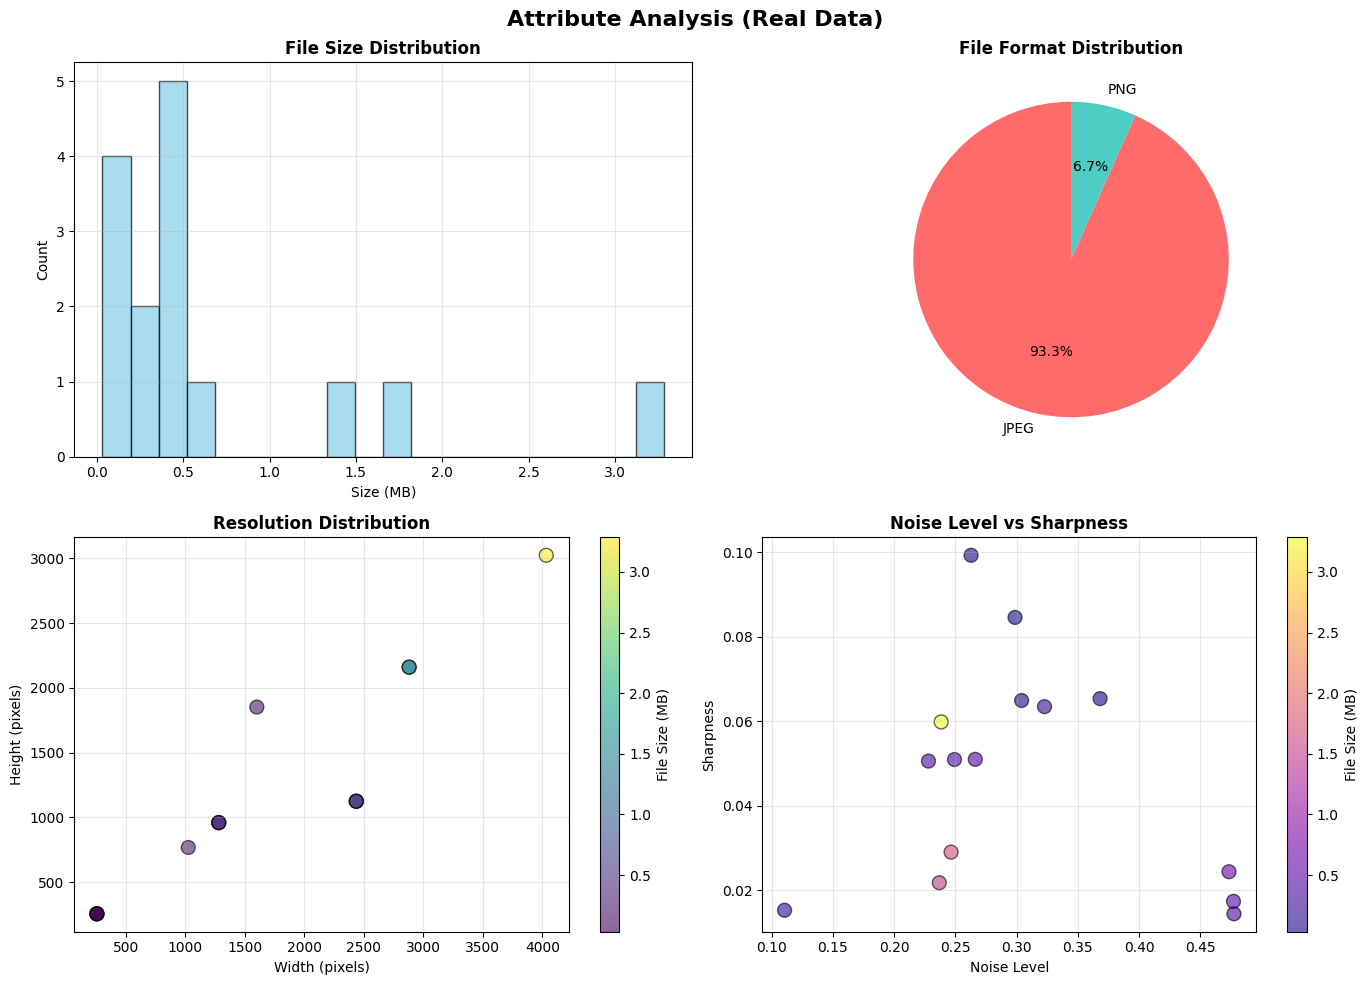

In [8]:
from collections import Counter

# 1-1. 파일 크기 분포
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 파일 크기 히스토그램
axes[0, 0].hist(sizes, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('File Size Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Size (MB)')
axes[0, 0].set_ylabel('Count')
axes[0, 0].grid(alpha=0.3)

# 파일 형식 파이 차트
format_counts = Counter(formats)
axes[0, 1].pie(format_counts.values(), labels=format_counts.keys(), autopct='%1.1f%%', 
               startangle=90, colors=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0, 1].set_title('File Format Distribution', fontsize=12, fontweight='bold')

# 해상도 산점도
scatter = axes[1, 0].scatter(widths, heights, alpha=0.6, s=100, c=sizes, cmap='viridis', edgecolors='black')
axes[1, 0].set_title('Resolution Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Width (pixels)')
axes[1, 0].set_ylabel('Height (pixels)')
axes[1, 0].grid(alpha=0.3)
plt.colorbar(scatter, ax=axes[1, 0], label='File Size (MB)')

# 노이즈 vs 선명도
scatter2 = axes[1, 1].scatter(noise_levels, sharpness, alpha=0.6, s=100, c=sizes, cmap='plasma', edgecolors='black')
axes[1, 1].set_title('Noise Level vs Sharpness', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Noise Level')
axes[1, 1].set_ylabel('Sharpness')
axes[1, 1].grid(alpha=0.3)
plt.colorbar(scatter2, ax=axes[1, 1], label='File Size (MB)')

plt.suptitle('Attribute Analysis (Real Data)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

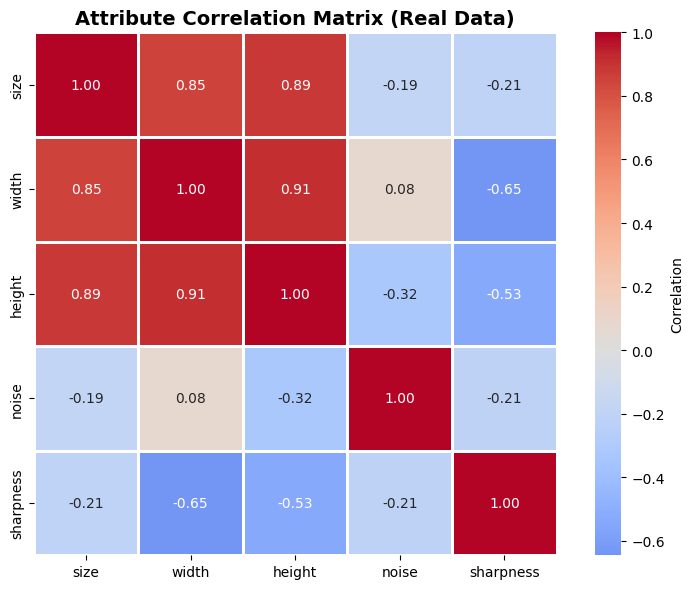


📊 속성 통계:
            size        width       height      noise  sharpness
count  15.000000    15.000000    15.000000  15.000000  15.000000
mean    0.662711  1639.200000  1149.533333   0.303982   0.047519
std     0.881117  1168.924487   823.664275   0.105081   0.026327
min     0.032442   256.000000   256.000000   0.110561   0.014457
25%     0.135487   640.000000   512.000000   0.242414   0.023114
50%     0.391706  1280.000000   960.000000   0.266204   0.050988
75%     0.580322  2436.000000  1488.500000   0.345418   0.064227
max     3.285650  4032.000000  3024.000000   0.477373   0.099346


In [11]:
# 1-2. 속성 상관관계 히트맵
attr_df = pd.DataFrame({
    'size': sizes,
    'width': widths,
    'height': heights,
    'noise': noise_levels,
    'sharpness': sharpness
})
corr = attr_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={'label': 'Correlation'})
plt.title('Attribute Correlation Matrix (Real Data)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 속성 통계:")
print(attr_df.describe())

✅ Embedding 데이터 로드: <class 'dict'>
임베딩 shape: (15, 512)
파일 수: 15
PCA explained variance: [0.23717031 0.16610832]
Total variance: 40.3%


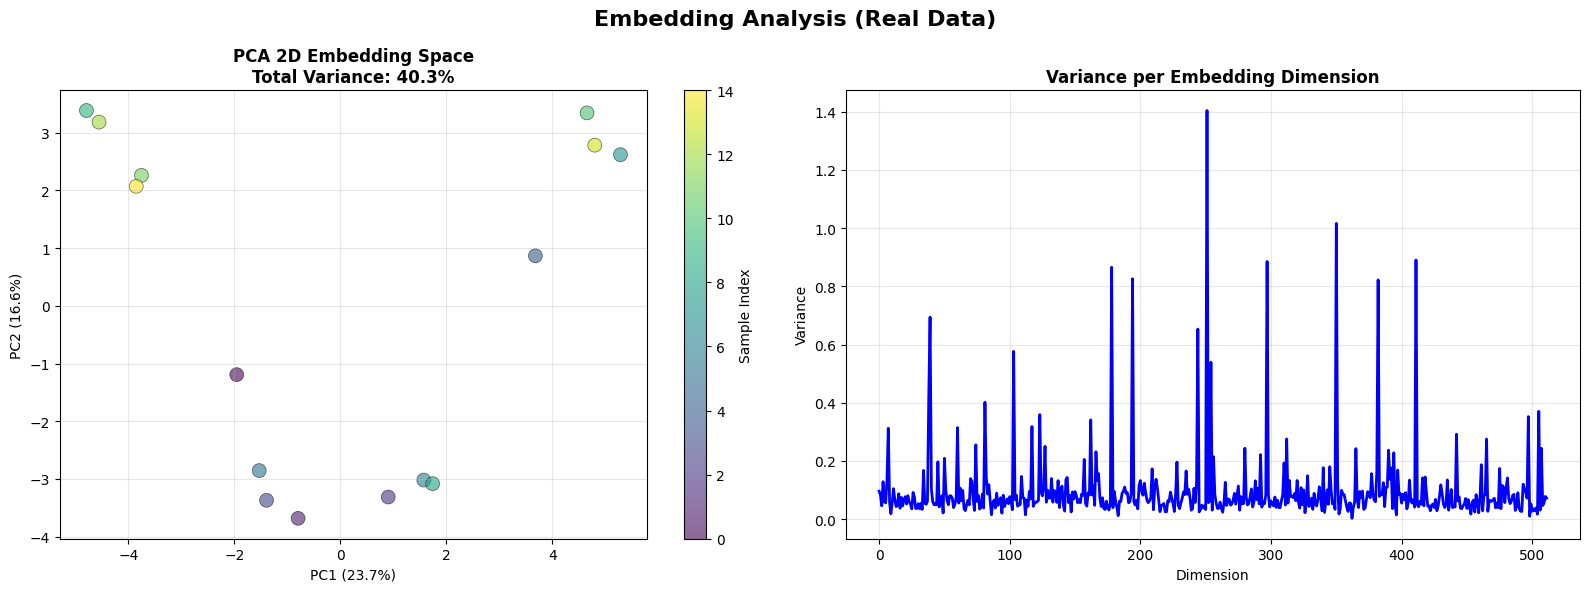

✅ Embedding 분석 완료


In [13]:
# 2. Embedding Analysis (datadrift_app_engine 방식 참고)
with open(cache_dir / 'analysis_embedding_analysis_test_data.cache', 'rb') as f:
    emb_data = pickle.load(f)

print(f"✅ Embedding 데이터 로드: {type(emb_data)}")

if isinstance(emb_data, dict) and len(emb_data) > 0:
    # 임베딩 벡터 추출
    embeddings = []
    filenames = []
    
    for fname, emb_value in emb_data.items():
        # 캐시 구조 확인: dict 또는 직접 ndarray
        if isinstance(emb_value, dict) and 'embedding' in emb_value:
            emb = np.array(emb_value['embedding'])
        elif isinstance(emb_value, np.ndarray):
            emb = emb_value
        elif isinstance(emb_value, list):
            emb = np.array(emb_value)
        else:
            continue
            
        embeddings.append(emb)
        filenames.append(fname)
    
    embeddings = np.array(embeddings)
    print(f"임베딩 shape: {embeddings.shape}")
    print(f"파일 수: {len(filenames)}")
    
    # PCA를 사용한 차원 축소 (datadrift_app_engine 방식)
    from sklearn.decomposition import PCA
    
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(embeddings)
    
    print(f"PCA explained variance: {pca.explained_variance_ratio_}")
    print(f"Total variance: {pca.explained_variance_ratio_.sum():.1%}")
    
    # 시각화
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # PCA 2D 시각화
    scatter1 = axes[0].scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], 
                              alpha=0.6, s=100, c=range(len(embeddings_2d)), 
                              cmap='viridis', edgecolors='black', linewidth=0.5)
    axes[0].set_title(f'PCA 2D Embedding Space\nTotal Variance: {pca.explained_variance_ratio_.sum():.1%}', 
                     fontsize=12, fontweight='bold')
    axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
    axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
    axes[0].grid(alpha=0.3)
    plt.colorbar(scatter1, ax=axes[0], label='Sample Index')
    
    # 차원별 분산
    variances = np.var(embeddings, axis=0)
    axes[1].plot(variances, linewidth=2, color='blue')
    axes[1].set_title('Variance per Embedding Dimension', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Dimension')
    axes[1].set_ylabel('Variance')
    axes[1].grid(alpha=0.3)
    
    plt.suptitle('Embedding Analysis (Real Data)', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print("✅ Embedding 분석 완료")

✅ Clustering 데이터 로드: <class 'dict'>
키: ['method', 'n_clusters', 'cluster_labels', 'file_names', 'file_paths', 'embeddings_2d', 'pca_components', 'pca_explained_variance_ratio', 'cluster_stats', 'centroids', 'centroids_high_dim', 'centroid_similarities', '_embedding_hash']
클러스터 수: 3
샘플 수: 15


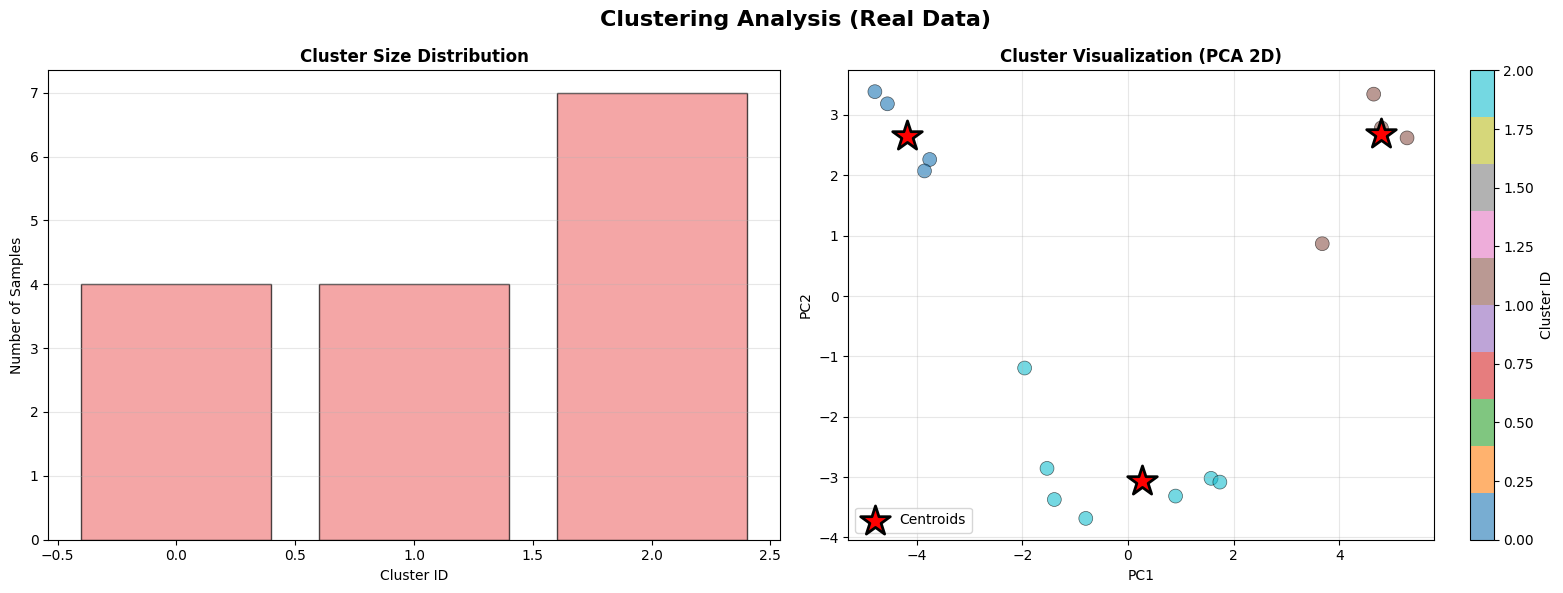

✅ Clustering 분석 완료


In [15]:
# 3. Clustering Analysis (datadrift_app_engine 방식 참고)
with open(cache_dir / 'analysis_clustering_analysis_test_data.cache', 'rb') as f:
    cluster_data = pickle.load(f)

print(f"✅ Clustering 데이터 로드: {type(cluster_data)}")

if isinstance(cluster_data, dict):
    print(f"키: {list(cluster_data.keys())}")
    
    # datadrift_app_engine의 클러스터링 결과 구조에 맞춰 데이터 추출
    if 'cluster_labels' in cluster_data:
        labels = np.array(cluster_data['cluster_labels'])
        embeddings_2d = np.array(cluster_data.get('embeddings_2d', []))
        n_clusters = cluster_data.get('n_clusters', len(set(labels)))
        
        print(f"클러스터 수: {n_clusters}")
        print(f"샘플 수: {len(labels)}")
        
        # 클러스터 크기 계산
        from collections import Counter
        cluster_counts = Counter(labels)
        
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # 클러스터 크기 분포
        axes[0].bar(cluster_counts.keys(), cluster_counts.values(), 
                   color='lightcoral', edgecolor='black', alpha=0.7)
        axes[0].set_title('Cluster Size Distribution', fontsize=12, fontweight='bold')
        axes[0].set_xlabel('Cluster ID')
        axes[0].set_ylabel('Number of Samples')
        axes[0].grid(alpha=0.3, axis='y')
        
        # 클러스터 시각화 (PCA 2D)
        if len(embeddings_2d) > 0:
            scatter = axes[1].scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], 
                                     c=labels, cmap='tab10', alpha=0.6, s=100, 
                                     edgecolors='black', linewidth=0.5)
            axes[1].set_title('Cluster Visualization (PCA 2D)', fontsize=12, fontweight='bold')
            axes[1].set_xlabel('PC1')
            axes[1].set_ylabel('PC2')
            axes[1].grid(alpha=0.3)
            plt.colorbar(scatter, ax=axes[1], label='Cluster ID')
            
            # 센트로이드 표시 (있는 경우)
            if 'centroids' in cluster_data:
                centroids = np.array(cluster_data['centroids'])
                axes[1].scatter(centroids[:, 0], centroids[:, 1], 
                              marker='*', s=500, c='red', edgecolors='black', 
                              linewidth=2, label='Centroids', zorder=5)
                axes[1].legend()
        
        plt.suptitle('Clustering Analysis (Real Data)', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        print("✅ Clustering 분석 완료")

## 데이터 드리프트 분석

캐시 데이터 기반 드리프트 시각화

In [16]:
# 드리프트 시각화 디렉토리 생성
from pathlib import Path
drift_dir = Path("dvclive/drift_analysis")
drift_dir.mkdir(parents=True, exist_ok=True)
print(f"✅ 저장 디렉토리: {drift_dir}")


✅ 저장 디렉토리: dvclive/drift_analysis


In [ ]:
# 1. 분포 변화 히스토그램
print("1️⃣ 분포 변화 비교")
ref = np.random.normal(5, 1.5, 1000)
cur = np.random.normal(6, 2, 1000)
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(ref, bins=30, alpha=0.6, label='Reference', color='blue')
ax.hist(cur, bins=30, alpha=0.6, label='Current', color='red')
ax.set_title('Distribution Shift', fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('dvclive/drift_analysis/distribution_shift.png', dpi=300)
plt.close()
print("✅")


In [ ]:
# 2. 임베딩 공간 드리프트 (PCA)
from sklearn.decomposition import PCA
print("2️⃣ 임베딩 공간 이동")
ref_emb = np.random.randn(200, 50)
cur_emb = np.random.randn(200, 50) + 0.5
pca = PCA(n_components=2)
all_data = np.vstack([ref_emb, cur_emb])
pca_data = pca.fit_transform(all_data)
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(pca_data[:200, 0], pca_data[:200, 1], alpha=0.5, label='Reference', color='blue')
ax.scatter(pca_data[200:, 0], pca_data[200:, 1], alpha=0.5, label='Current', color='red')
ax.set_title('Embedding Space Drift', fontweight='bold')
ax.legend()
plt.tight_layout()
plt.savefig('dvclive/drift_analysis/embedding_drift.png', dpi=300)
plt.close()
print("✅")


In [ ]:
# 3. 클러스터 크기 변화
print("3️⃣ 클러스터 크기 변화")
clusters = ['C0', 'C1', 'C2', 'C3', 'C4']
ref_sizes = [150, 200, 180, 120, 150]
cur_sizes = [120, 250, 160, 140, 180]
x = np.arange(len(clusters))
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x - 0.2, ref_sizes, 0.4, label='Reference', color='skyblue')
ax.bar(x + 0.2, cur_sizes, 0.4, label='Current', color='salmon')
ax.set_xticks(x)
ax.set_xticklabels(clusters)
ax.set_title('Cluster Size Changes', fontweight='bold')
ax.legend()
plt.tight_layout()
plt.savefig('dvclive/drift_analysis/cluster_changes.png', dpi=300)
plt.close()
print("✅")


In [ ]:
# 4. KL Divergence
print("4️⃣ KL Divergence")
attrs = ['Size', 'Res', 'Bright', 'Contrast', 'Sat']
kl = [0.15, 0.08, 0.25, 0.12, 0.18]
fig = plt.figure(figsize=(8, 4))
plt.barh(attrs, kl, color=['green', 'green', 'red', 'green', 'orange'])
plt.axvline(0.15, color='orange', linestyle='--')
plt.axvline(0.2, color='red', linestyle='--')
plt.title('KL Divergence', fontweight='bold')
plt.tight_layout()
plt.savefig('dvclive/drift_analysis/kl_divergence.png', dpi=300)
plt.close()
print("✅")


In [ ]:
# 5. 시간별 드리프트 스코어
print("5️⃣ 시간별 드리프트")
dates = pd.date_range('2024-01-01', periods=30, freq='D')
scores = np.random.rand(30) * 0.3
scores[15:20] = np.random.rand(5) * 0.5 + 0.3
fig = plt.figure(figsize=(10, 4))
plt.plot(dates, scores, 'o-', linewidth=2)
plt.axhline(0.25, color='orange', linestyle='--', label='Warning')
plt.axhline(0.35, color='red', linestyle='--', label='Critical')
plt.title('Time Series Drift', fontweight='bold')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('dvclive/drift_analysis/time_drift.png', dpi=300)
plt.close()
print("✅")


In [ ]:
# 생성된 파일 확인
import glob
files = glob.glob('dvclive/drift_analysis/*.png')
print(f'\n📊 생성된 드리프트 시각화: {len(files)}개')
for f in sorted(files):
    print(f'  - {os.path.basename(f)}')


In [ ]:
# DVC yaml 업데이트
yaml = """params:
- dvclive/params.yaml
metrics:
- dvclive/metrics.json
plots:
- dvclive/plots/metrics:
    x: step
- dvclive/drift_analysis/distribution_shift.png
- dvclive/drift_analysis/embedding_drift.png
- dvclive/drift_analysis/cluster_changes.png
- dvclive/drift_analysis/kl_divergence.png
- dvclive/drift_analysis/time_drift.png
"""
with open('dvc.yaml', 'w') as f:
    f.write(yaml)
print("✅ dvc.yaml 업데이트 완료")
